
# ***Cancelación de reservas en hoteles***

---



# Contexto y audiencia




El Hotel Continental busca maximizar sus ganancias al ofrecer habitaciones a precios estratégicos, al mismo tiempo que garantiza una experiencia excepcional para sus clientes. Utilizando predicciones y experiencias previas, el hotel espera adaptar sus estrategias para alcanzar los niveles de ocupación deseados. Sin embargo, las cancelaciones de reservas pueden surgir por diversos motivos, como la disponibilidad de habitaciones en otros hoteles a precios competitivos o imprevistos de última hora. El hotel tiene como objetivo gestionar estas situaciones de manera efectiva, minimizando las cancelaciones, maximizando la ocupación y asegurando una rentabilidad óptima, todo ello con el fin de brindar una experiencia altamente satisfactoria a sus clientes.

Para analizar esta situacion, se va a utilizar la informacion del dataset de Hotel Reservations disponibles en la plataforma de Kaggle, que cuenta con 36275 registros de reservas tomadas y canceladas por clientes entre 2017 y 2018.

# Preguntas de hipótesis

¿Existe una diferencia en las cancelaciones entre los diferentes medios de reserva utilizados por los clientes, como reservas directas en el hotel, online u otros medios?

¿El tipo de habitación reservada influye en la probabilidad de cancelación?

#Librerias

In [ ]:
# librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Importar archivo

from google.colab import files
 
files.upload()

In [ ]:
# Creación dataframe

df_reservation = pd.read_csv('Hotel Reservations.csv')
df_reservation.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data wrangling

In [ ]:
# Size del dataset
df_reservation.shape

(36275, 19)

In [ ]:
# Info Dataset
df_reservation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Valores nulos

df_reservation.isnull().values.any()

False

In [ ]:
df_reservation.reset_index()

,index,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Analisis exploratorio

Inicialmente, para el analisis, se debe comprender si existe variacion en las reservas tomadas y canceladas por año. En el siguiente grafico, se puede evidenciar que tanto las cancelaciones como las reservas de un periodo a otro han aumentando. Puntualmente para las cancelaciones, esto podria deberse a cambios en las estrategias de precios del hotel, cambios en canales de reserva, entre otros. 

<Axes: xlabel='arrival_year'>

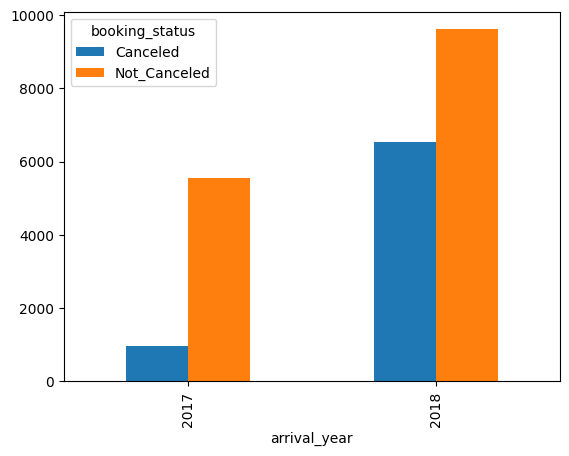

In [ ]:
#Los datos presentan un desbalance en cuanto a los meses, ya que la data de 2017 solo contiene informacion del segundo semestre del año
#mientras que la data de 2018 contiene la informacion de todos los meses.

df_reservation_month = df_reservation[df_reservation['arrival_month'] > 6]
df_reservation_month.groupby(['booking_status','arrival_year'])['Booking_ID'].count().unstack(0).plot(kind='bar')

Si ahora se revisa el detalle de reservas y cancelaciones por mes se puede ver que para los meses de noviembre y diciembre de un año a otro las cancelaciones aumentaron de gran manera. Esto podria deberse a cambios en los precios por habitacion ofrecidas por otros alojamientos o por el mismo hotel durante este periodo de temporada alta.

In [ ]:
df_reservation_month.groupby(['arrival_year','arrival_month'])['Booking_ID'].count()

pd.crosstab(df_reservation_month['arrival_month'], [df_reservation_month['arrival_year'], df_reservation['booking_status']], rownames=['arrival_month'], colnames=['arrival_year', 'booking_status'], margins = True, margins_name = "Total")

arrival_year       2017                  2018               Total
booking_status Canceled Not_Canceled Canceled Not_Canceled       
arrival_month                                                    
7                   243          120     1071         1486   2920
8                   185          829     1303         1496   3813
9                   182         1467     1356         1606   4611
10                  302         1611     1578         1826   5317
11                   27          620      848         1485   2980
12                   22          906      380         1713   3021
Total               961         5553     6536         9612  22662

Analizando la informacion por el canal de reserva y distribución de cancelaciones y reservas tomadas por parte de los clientes. Se evidencia que en el canal Online se evidencia que se presenta el mayor porcentaje de cancelaciones. Esto se podria deber a posiblemente las ofertas ofrecidas por este medio dejan de ser atractivas por los clientes, frente a otros canales de reserva. Tambien es importante mencionar, que en la actualidad existen numerosos canales digitales en los que los clientes pueden obtener mejores ofertas en otros alojamientos o en el mismo hotel.

<Axes: xlabel='booking_status', ylabel='market_segment_type'>

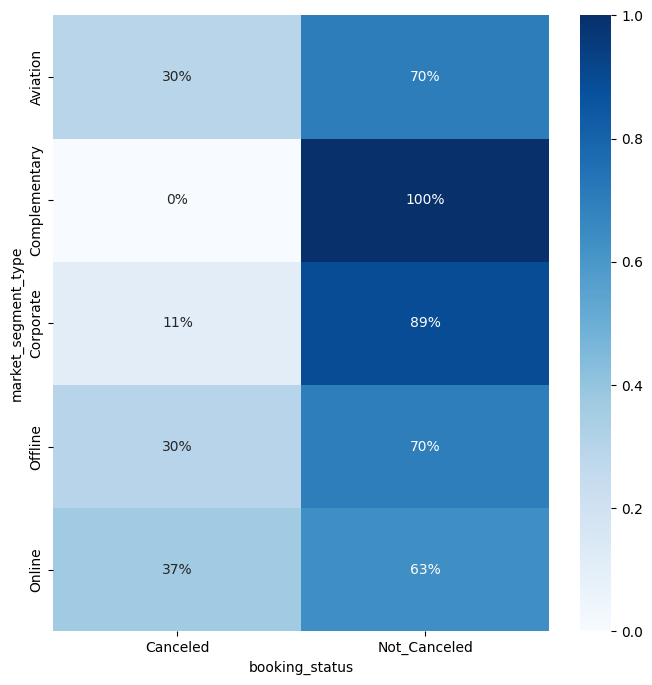

In [ ]:
plt.figure(figsize = (8,8))

cross = pd.crosstab(df_reservation['market_segment_type'], df_reservation['booking_status'], normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

Con respecto a la cantidad de reservaciones por tipo de habitación, se evidencia que la habitación que mas escogen los clientes es la tipo 1 y la menos seleccionada la 3. Se deberia analizar la razón por la cual esta ultima no es elegida por los clientes y validar si se esta ofreciendo por el canal y al publico correcto.

Text(0.5, 1.0, 'Cantidad de reservas por tipo de habitación')

<Figure size 3000x2000 with 0 Axes>

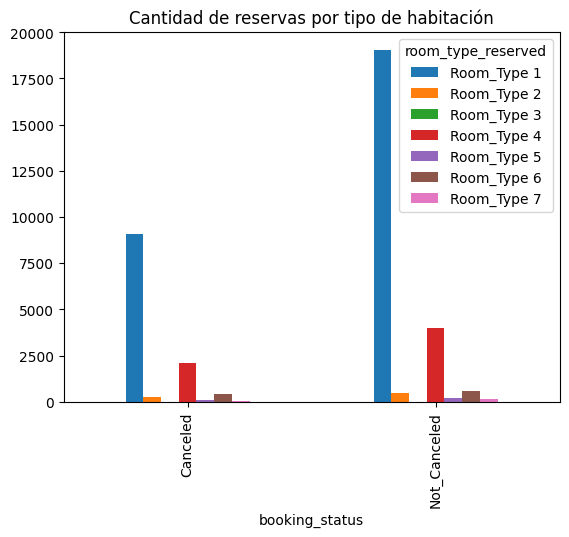

In [ ]:
plt.figure(figsize=[30,20])

df_reservation.groupby(['room_type_reserved','booking_status'])['Booking_ID'].count().unstack(0).plot(kind='bar')

plt.title('Cantidad de reservas por tipo de habitación')

En cuanto a la  distribución del promedio de precios por habitación, en general para las reservas canceladas se evidencia que el precio promedio era mas alto o igual que las que se tomaron. Esto podria deberse a que los clientes antes de la fecha de su viaje revisan si existen promociones de ultimo minuto con mejores precios.

Text(0.5, 1.0, 'Precio promedio por habitación')

<Figure size 1000x800 with 0 Axes>

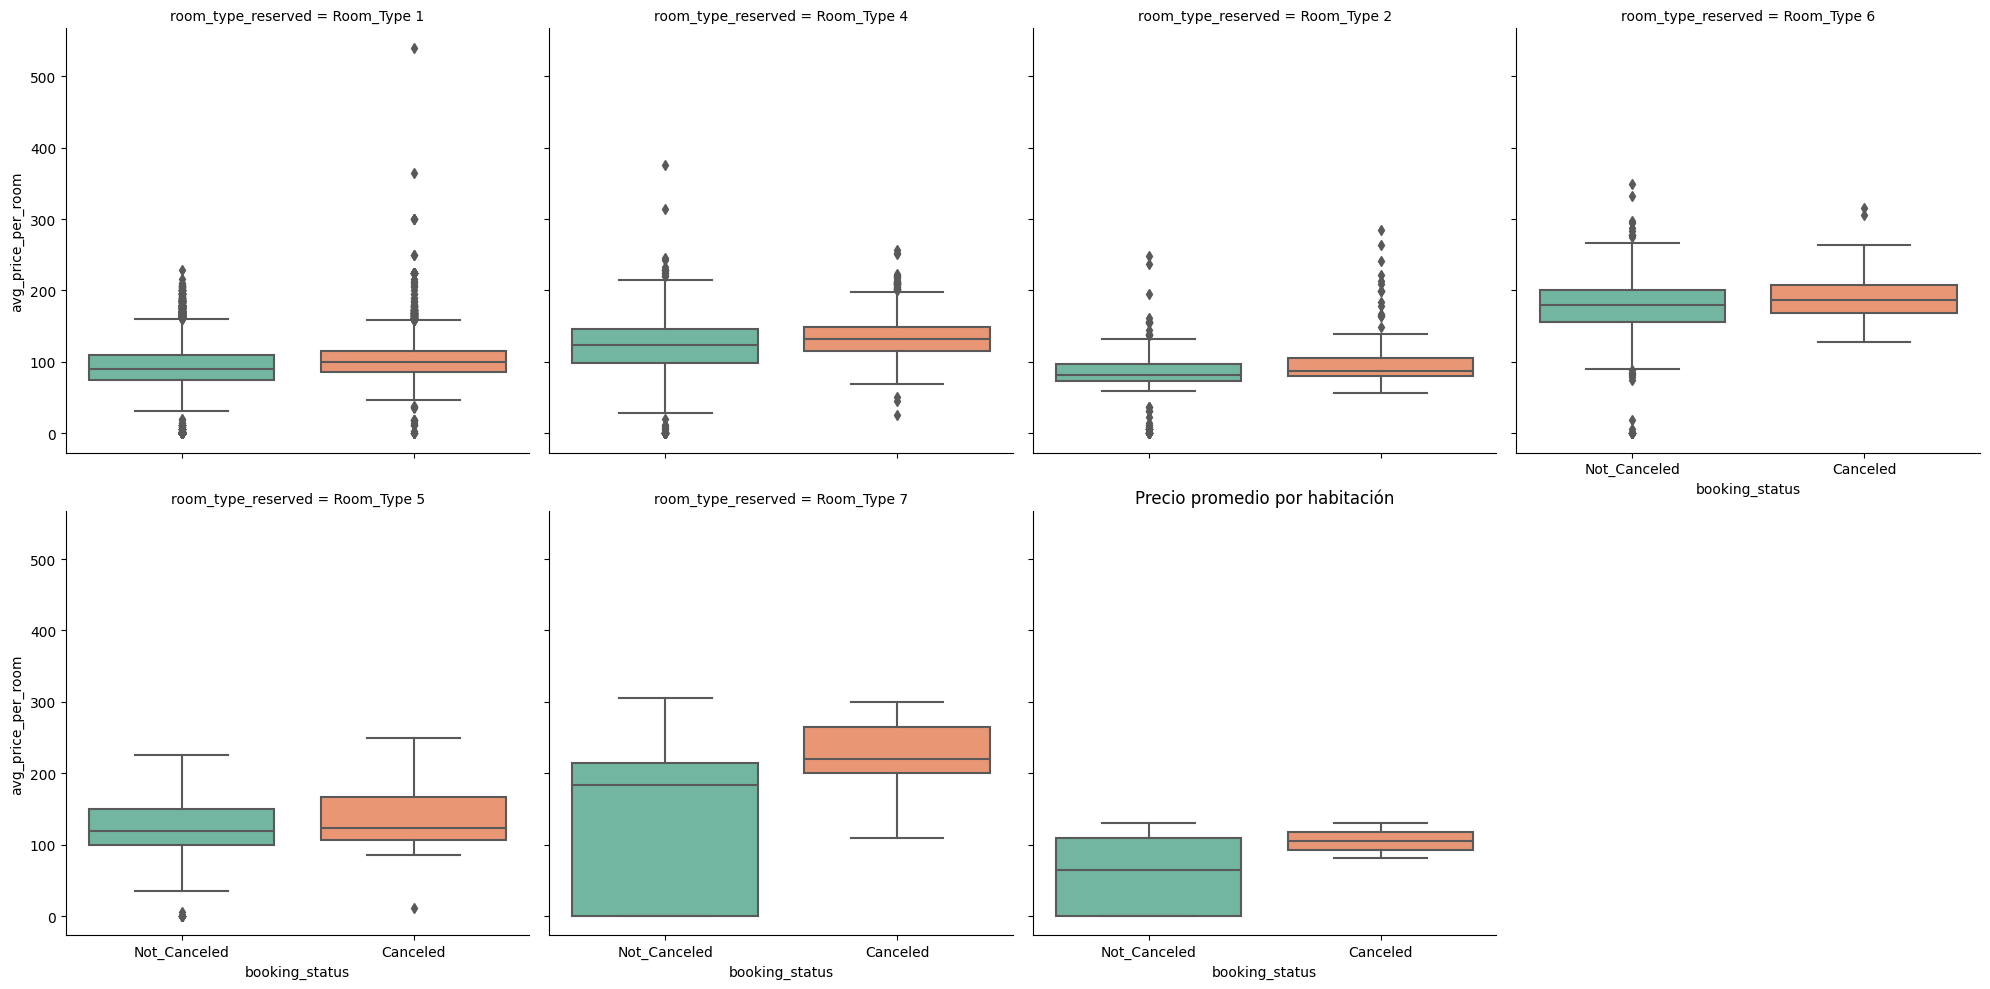

In [ ]:
plt.figure(figsize=(10, 8))

plot = sns.catplot(data=df_reservation, x='booking_status', y='avg_price_per_room', col='room_type_reserved', kind='box', palette = 'Set2' ,col_wrap=4)

plt.title('Precio promedio por habitación')

En las siguientes 2 gráficas se muestra los días entre semana y fin de semana seleccionados por los clientes. Se evidencia que la mayoria se agendaron entre semana. Esto se puede deber a que los precios de las habitaciones son mas economicos entre semana.

Text(0.5, 1.0, 'Días reservados - Fines de Semana')

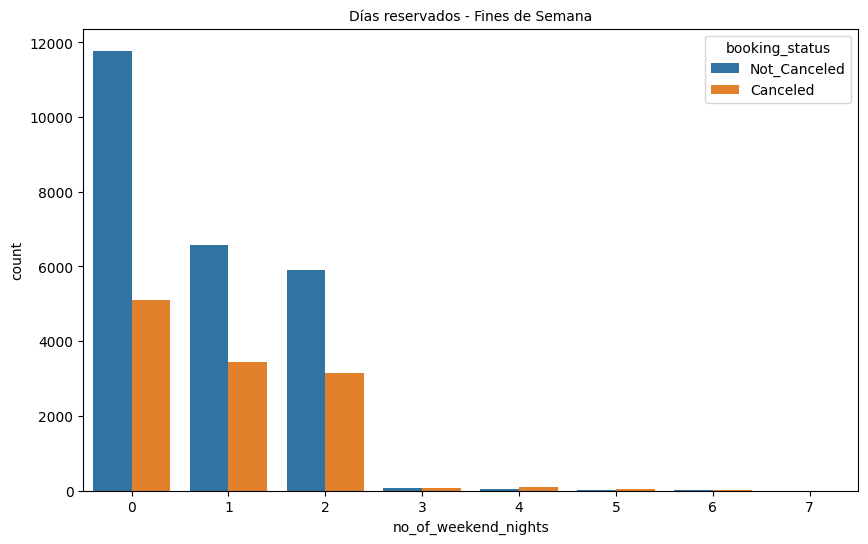

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='no_of_weekend_nights', hue='booking_status', data=df_reservation)
plt.title('Días reservados - Fines de Semana', fontsize=10)


Text(0.5, 1.0, 'Días reservados - Fines de Semana')

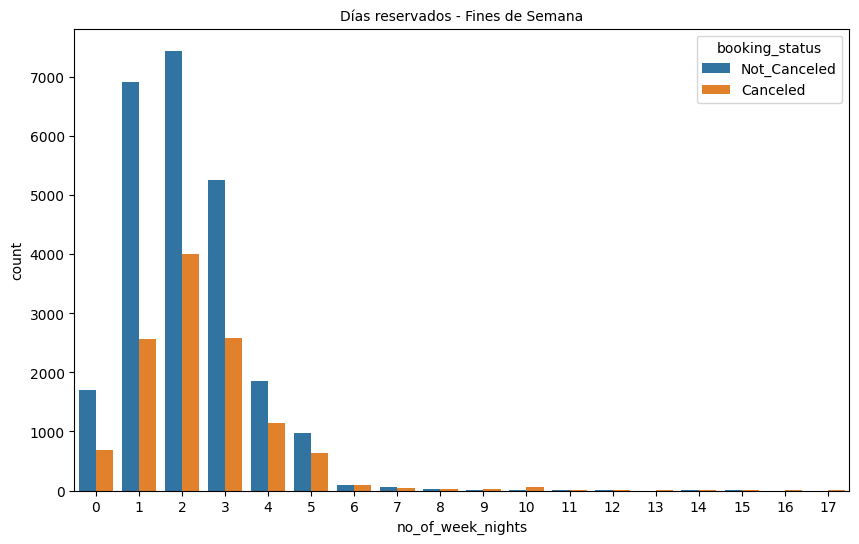

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='no_of_week_nights', hue='booking_status', data=df_reservation)
plt.title('Días reservados - Fines de Semana', fontsize=10)

En la siguiente tabla se evidencian las cantidades de habitaciones canceladas y tomadas dependiendo de la cantidad de adultos que reservaron. Se evidencia que la menor cantidad de reservas canceladas se da para las habitaciones tipo 3, 5 y 7 y la mayor cantidad para las tipo 1,2,4 y 6. A su vez, la mayor cantidad de cancelaciones se concentran entre 1 y 3 adultos que toman la habitación.

In [ ]:
pd.crosstab(df_reservation['room_type_reserved'], [df_reservation['booking_status'], df_reservation['no_of_adults']], rownames=['room_type_reserved'], colnames=['booking_status', 'no_of_adults'], margins = True, margins_name = "Total")

booking_status     Canceled                     Not_Canceled               \
no_of_adults              0     1     2    3  4            0     1      2   
room_type_reserved                                                          
Room_Type 1               1  1643  7296  132  0            2  5293  13414   
Room_Type 2              43     5   180    0  0           90    21    352   
Room_Type 3               0     0     2    0  0            0     3      2   
Room_Type 4               0   156  1205  708  0            0   417   2541   
Room_Type 5               0    29    37    6  0            0    71     98   
Room_Type 6               0    22   377    7  0            2    20    505   
Room_Type 7               0     1    22   10  3            1    14     77   
Total                    44  1856  9119  863  3           95  5839  16989   

booking_status                Total  
no_of_adults           3   4         
room_type_reserved                   
Room_Type 1          349   0  28130  
Room_Type 2            1   0    692  
Room_Type 3            0   0      7  
Room_Type 4         1029   1   6057  
Room_Type 5           23   1    265  
Room_Type 6           32   1    966  
Room_Type 7           20  10    158  
Total               1454  13  36275


En cuanto el medio de reserva y plan de comidas la cantidad de cancelaciones y reservas tomadas, se evidencia que la mayor cantidad de cancelaciones y habitaciones elegidas se presentan para el plan numero 1 para los formatos corporativos, offline y online. Podria contemplarse la posibilidad de reestructurar los planes de comida ofrecidos para hacer mas atrativa la oferta al cliente.

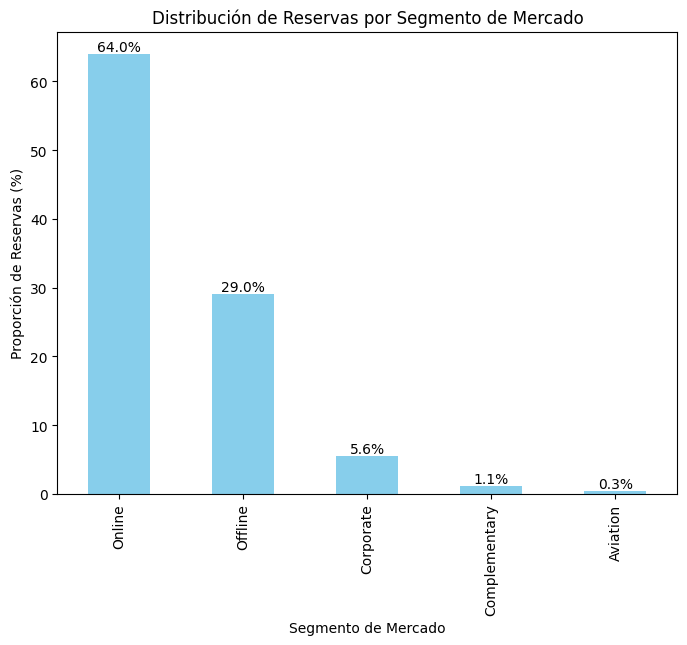

In [ ]:
# Calculamos la distribución de reservas por segmento de mercado
reservas_por_segmento = df_reservation['market_segment_type'].value_counts(normalize=True) * 100

# Creamos un gráfico de barras para visualizar la distribución de reservas por segmento de mercado
plt.figure(figsize=(8, 6))
reservas_por_segmento.plot(kind='bar', color='skyblue')

# Configuramos el título y las etiquetas de los ejes
plt.title('Distribución de Reservas por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Proporción de Reservas (%)')

# Mostramos el valor de cada barra encima de la misma
for i, value in enumerate(reservas_por_segmento):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

## Obtencion de **Insights**

In [ ]:
# Crear una tabla de contingencia entre las variables booking_status y market_segment_type
pd.crosstab(df_reservation['market_segment_type'], [df_reservation['booking_status'], df_reservation['type_of_meal_plan']], rownames=['market_segment_type'], colnames=['booking_status', 'type_of_meal_plan'], margins = True, margins_name = "Total")

booking_status         Canceled                                       \
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Meal Plan 3 Not Selected   
market_segment_type                                                    
Aviation                     37           0           0            0   
Complementary                 0           0           0            0   
Corporate                   213           0           0            7   
Offline                    2176         961           1           15   
Online                     6253         545           0         1677   
Total                      8679        1506           1         1699   

booking_status      Not_Canceled                                       Total  
type_of_meal_plan    Meal Plan 1 Meal Plan 2 Meal Plan 3 Not Selected         
market_segment_type                                                           
Aviation                      88           0           0            0    125  
Complementary                370          11           4            6    391  
Corporate                   1783           6           0            8   2017  
Offline                     5812        1404           0          159  10528  
Online                     11103         378           0         3258  23214  
Total                      19156        1799           4         3431  36275

In [ ]:
from scipy.stats import chi2_contingency #Vamos a usar chi cuadrado en este caso

In [ ]:
# Creamos una tabla de contingencia entre las variables booking_status y market_segment_type
contingency_table = pd.crosstab(df_reservation['booking_status'], df_reservation['market_segment_type'])

# Aplicamos el test chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p_value)

Chi-square statistic: 814.1088652405568
p-value: 6.74876302455762e-175


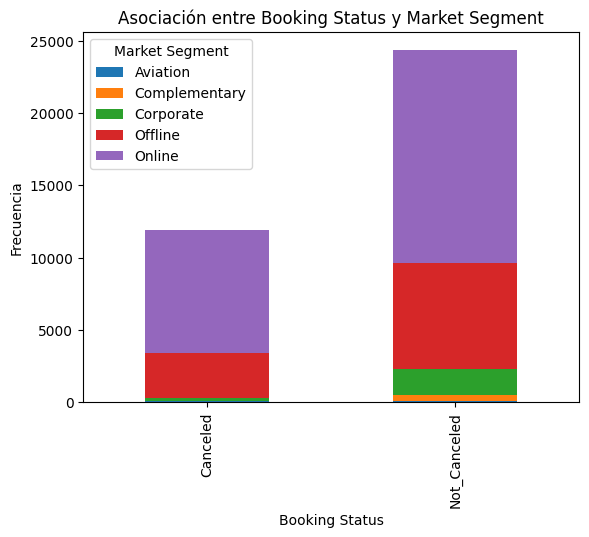

In [ ]:
# Creamos un gráfico de barras apiladas para la visualizacion
contingency_table.plot(kind='bar', stacked=True)
plt.title('Asociación entre Booking Status y Market Segment')
plt.xlabel('Booking Status')
plt.ylabel('Frecuencia')
plt.legend(title='Market Segment')

plt.show()

Los resultados del test chi-cuadrado indican que existe una asociación significativa entre el estado de reserva ("booking_status") y el tipo de segmento de mercado ("market_segment_type") en el conjunto de datos de reservas de hoteles.

Ahora veamos la asociacion entre booking_status y room_type_reserved

In [ ]:
# Creamos una tabla de contingencia entre las variables booking_status y room_type_reserved
contingency_table2 = pd.crosstab(df_reservation['booking_status'], df_reservation['room_type_reserved'])

# Aplicamos el test chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p_value)

Chi-square statistic: 814.1088652405568
p-value: 6.74876302455762e-175


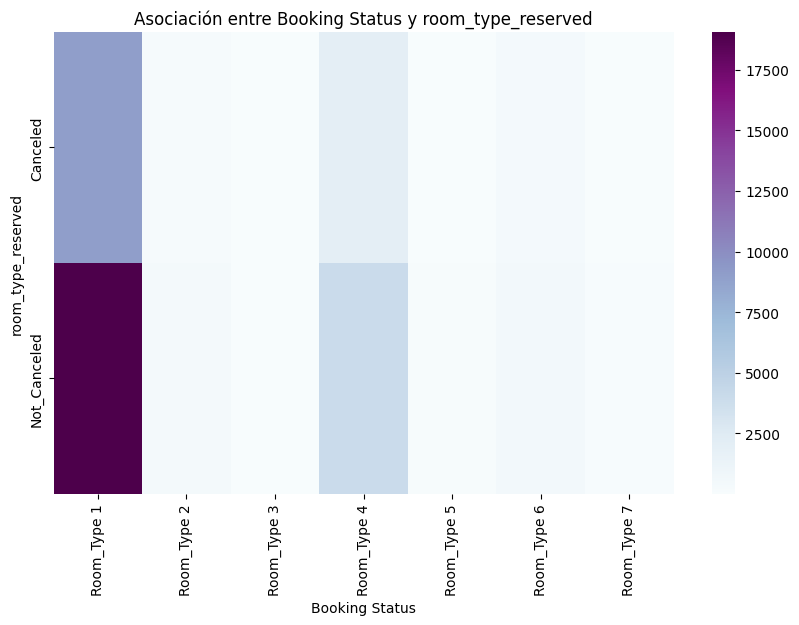

In [ ]:
#En este caso usamos un heatmap para visualizar
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table2, cmap="BuPu")
plt.title('Asociación entre Booking Status y room_type_reserved')
plt.ylabel('room_type_reserved')
plt.xlabel('Booking Status')

plt.show()

Estos resultados sugieren que el estado de reserva y el tipo de habitacion reservada están relacionados y que el tipo de habitacion reservada puede influir en el estado de reserva de hotel.

#### Feature selection (En proceso)



Para encontrar las caracteristicas con mayor relevancia para correr en el posible modelo,se realizo la separación del dataset entre los datos de entrada y salida, asi como conjuntos de prueba y test. Para este caso, los datos de entrada y salida eran categoricos, por la tanto inicialmente se probaria uhn modelo de regresiónPara la preparación de esta variables para el modelo se utilizo variables dummy y posteriormente se utilizo la funcion chi2 para encontrar las variables que tenian mayor relevancia en la cancelación de las reservas.

In [ ]:
df_X = df_reservation.iloc[:, 0:-1]
df_y = df_reservation.iloc[:, -1]

In [ ]:
df_X.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0


In [ ]:
df_y.head()

0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20)

In [ ]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (29020, 18) (29020,)
Test (7255, 18) (7255,)


In [ ]:
X_train_encode = pd.get_dummies(X_train,columns=['type_of_meal_plan','required_car_parking_space', 'room_type_reserved', 'market_segment_type','repeated_guest'], prefix_sep='_')
X_test_encode = pd.get_dummies(X_test, columns=['type_of_meal_plan','required_car_parking_space', 'room_type_reserved', 'market_segment_type','repeated_guest'],prefix_sep='_')


In [ ]:
X_train_encode.drop(['Booking_ID', 'type_of_meal_plan_Meal Plan 3'], axis=1, inplace= True)
X_test_encode.drop(['Booking_ID','type_of_meal_plan_Meal Plan 3'], axis=1, inplace= True)

In [ ]:
X_train_encode.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_0,repeated_guest_1
25706,2,0,0,3,88,2018,6,2,0,0,...,0,0,0,0,0,0,0,1,1,0
9422,3,0,2,2,59,2018,12,4,0,0,...,0,0,0,0,0,0,0,1,1,0
8885,2,0,1,1,31,2018,4,9,0,0,...,0,0,0,0,0,0,0,1,1,0
6743,2,0,1,5,46,2018,11,21,0,0,...,0,0,0,0,0,0,1,0,1,0
10707,2,0,0,2,24,2018,1,6,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_test_encode.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_0,repeated_guest_1
31411,1,0,2,1,116,2018,2,28,0,0,...,0,0,0,0,0,0,1,0,1,0
32150,2,0,0,3,65,2017,10,22,0,0,...,0,0,0,0,0,0,0,1,1,0
30479,2,0,0,2,4,2018,1,22,0,0,...,0,0,0,0,0,0,0,1,1,0
22567,2,0,0,3,280,2018,12,6,0,0,...,0,0,0,0,0,0,0,1,1,0
25930,1,0,0,2,39,2018,3,4,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
Y_train_encode = pd.get_dummies(y_train, prefix_sep='_', drop_first=True)
Y_test_encode = pd.get_dummies(y_test, prefix_sep='_', drop_first=True)

In [ ]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_encode, Y_train_encode)
X_train_fs = fs.transform(X_train_encode)
X_test_fs = fs.transform(X_test_encode)

Feature 0: 36.628211
Feature 1: 52.080262
Feature 2: 96.011343
Feature 3: 231.147401
Feature 4: 489221.058713
Feature 5: 0.069259
Feature 6: 8.172904
Feature 7: 10.370653
Feature 8: 185.482149
Feature 9: 2200.871713
Feature 10: 7203.475852
Feature 11: 1842.122591
Feature 12: 27.585936
Feature 13: 206.788667
Feature 14: 0.541115
Feature 15: 6.915085
Feature 16: 215.317199
Feature 17: 4.445557
Feature 18: 0.000148
Feature 19: 0.000842
Feature 20: 10.381438
Feature 21: 1.748736
Feature 22: 26.424375
Feature 23: 7.646001
Feature 24: 0.451344
Feature 25: 157.980726
Feature 26: 362.531530
Feature 27: 29.915142
Feature 28: 122.136592
Feature 29: 9.180864
Feature 30: 337.280364


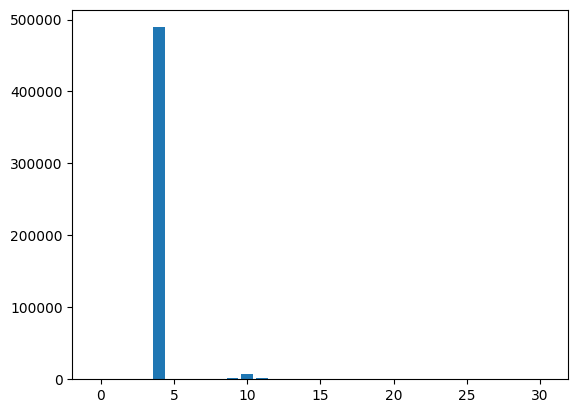

In [ ]:
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
for col in X_train_encode.columns:
    print(col)



no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
lead_time
arrival_year
arrival_month
arrival_date
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
avg_price_per_room
no_of_special_requests
type_of_meal_plan_Meal Plan 1
type_of_meal_plan_Meal Plan 2
type_of_meal_plan_Not Selected
required_car_parking_space_0
required_car_parking_space_1
room_type_reserved_Room_Type 1
room_type_reserved_Room_Type 2
room_type_reserved_Room_Type 3
room_type_reserved_Room_Type 4
room_type_reserved_Room_Type 5
room_type_reserved_Room_Type 6
room_type_reserved_Room_Type 7
market_segment_type_Aviation
market_segment_type_Complementary
market_segment_type_Corporate
market_segment_type_Offline
market_segment_type_Online
repeated_guest_0
repeated_guest_1


#### Modelo (En proceso)

In [ ]:
X_train_final = X_train_encode[['no_of_week_nights','no_of_previous_bookings_not_canceled','no_of_previous_cancellations', 'avg_price_per_room','market_segment_type_Complementary','market_segment_type_Aviation','market_segment_type_Offline','repeated_guest_0','required_car_parking_space_0','type_of_meal_plan_Meal Plan 1','arrival_date','no_of_weekend_nights']]

X_test_final = X_test_encode[['no_of_week_nights','no_of_previous_bookings_not_canceled','no_of_previous_cancellations', 'avg_price_per_room','market_segment_type_Complementary','market_segment_type_Aviation','market_segment_type_Offline','repeated_guest_0','required_car_parking_space_0','type_of_meal_plan_Meal Plan 1','arrival_date','no_of_weekend_nights']]

In [ ]:
Model = LogisticRegression(solver='lbfgs')
model.fit(X_train_final, Y_train_encode)

predict = model.predict(X_test_final)

accuracy = accuracy_score(Y_test_encode, predict)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 67.20


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
